In [14]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

from matplotlib.ticker import NullFormatter  # useful for `logit` scale
from astropy.time import Time
import os
from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [15]:
fermi_wise_list=pd.read_excel('/Users/brettlv/Downloads/mwa_paper/fermi_wise_data/fermi_sources.xlsx',sheet_name='Sheet1')

In [16]:
fermi_wise_list

,name,ned_name,ra,dec,type,z,mass,note
0,IC 1531,IC 1531,00h09m35.58s,-32d16m37.2s,G,0.025641,NaN,reclassified as radio galaxies
1,TXS 0149+710,WISEA J015325.85+711506.4,01h53m25.85s,+71d15m06.5s,G,0.022,NaN,reclassified as radio galaxies
2,PKS 1304-215,PKS 1304-215,13h06m42.23s,-21d48m11.9s,G,0.126,NaN,reclassified as radio galaxies
3,RGB J0250+172,WISEA J025037.96+171208.8,02h50m37.96s,+17d12m08.9s,G,1.1003,NaN,changed from a FSRQ to a BL Lac
4,NVSS J040324-242946,6dF J0403246-242950,04h03m24.50s,-24d29m50.2s,QSO,0.357,NaN,changed from a FSRQ to a BL Lac
5,GB6 J0941+2721,WISEA J094152.41+272217.8,09h41m52.42s,+27d22m17.9s,*,1.254,NaN,changed from a FSRQ to a BL Lac
6,2MASS J11303636+1018245,WISEA J113036.32+101824.7,11h30m36.32s,+10d18m24.8s,G,0.171574,NaN,changed from a FSRQ to a BL Lac
7,PKS 1144-379,[HB89] 1144-379,11h47m01.37s,-38d12m11.0s,QSO,1.048,8.7,changed from a FSRQ to a BL Lac
8,4C +15.54,[HB89] 1604+159,16h07m06.43s,+15d51m34.5s,QSO,0.496522,NaN,changed from a FSRQ to a BL Lac
9,TXS 1951-115,WISE J195441.15-112322.6,19h54m41.16s,-11d23m22.6s,QSO,0.683,NaN,changed from a FSRQ to a BL Lac


In [17]:
fermi_wise_list.columns

Index(['name', 'ned_name', 'ra', 'dec', 'type', 'z', 'mass', 'note'], dtype='object')

In [22]:
def plot(name):
    fig, axs = plt.subplots(1, 1,figsize=(16,8))
    axs.set_title(name)
    data_allwise_epoch=pd.read_csv(os.path.join('/Users/brettlv/Downloads/mwa_paper/fermi_wise_data/multi_epoch_wise/',name+'.csv'))
    data_neowise=pd.read_csv(os.path.join('/Users/brettlv/Downloads/mwa_paper/fermi_wise_data/neowise/',name+'.csv'))
    for i in range(2):
        name_mjd='mjd'
        name_band=data_allwise_epoch.columns[i*3+8]
        name_err=data_allwise_epoch.columns[i*3+9]
        print(name_mjd,name_band,name_err)
        data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()]  
        data_band=data_band[data_band[name_band].notnull()]        
        axs.errorbar(data_band[name_mjd],data_band[name_band],data_band[name_err],fmt='.',label=name_band+'multi_epoch')
        

    data_neowise_select=data_neowise.loc[:, ['w1mpro', 'w1sigmpro',
         'w2mpro', 'w2sigmpro','w1mpro_allwise', 'w1sigmpro_allwise', 'w2mpro_allwise',
        'w2sigmpro_allwise', 'w3mpro_allwise', 'w3sigmpro_allwise',
        'w4mpro_allwise', 'w4sigmpro_allwise','mjd']]

    for i in range(2):
        name_mjd='mjd'
        name_band=data_neowise_select.columns[i*2]
        name_err=data_neowise_select.columns[i*2+1]
        print(name_mjd,name_band,name_err)
        data_new=data_neowise_select[data_neowise_select[name_mjd].notnull()]
        data_new=data_new[data_new[name_band].notnull()]
        axs.errorbar(data_new[name_mjd],data_new[name_band],data_new[name_err],fmt='.',label=name_band+'_neo')
        
    axs.set_ylabel('magnitude')          
    axs.legend(loc=[1.0,0.7])
    axs.invert_yaxis()
    axs.xaxis.set_minor_locator(AutoMinorLocator())
    axs.grid(which='major',ls='-.',alpha=0.3)
    axs.set_ylabel('magnitude')
    axs.set_xlabel('mjd')
    plt.tight_layout()
    plt.savefig('/Users/brettlv/Downloads/mwa_paper/fermi_wise_data/fig_1/%s.png'%name,dpi=400)
    

IC 1531.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
TXS 0149+710.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
PKS 1304-215.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
RGB J0250+172.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
NVSS J040324-242946.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
GB6 J0941+2721.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
2MASS J11303636+1018245.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
PKS 1144-379.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w1sigmpro
mjd w2mpro w2sigmpro
4C +15.54.csv
mjd w1mpro_ep w1sigmpro_ep
mjd w2mpro_ep w2sigmpro_ep
mjd w1mpro w

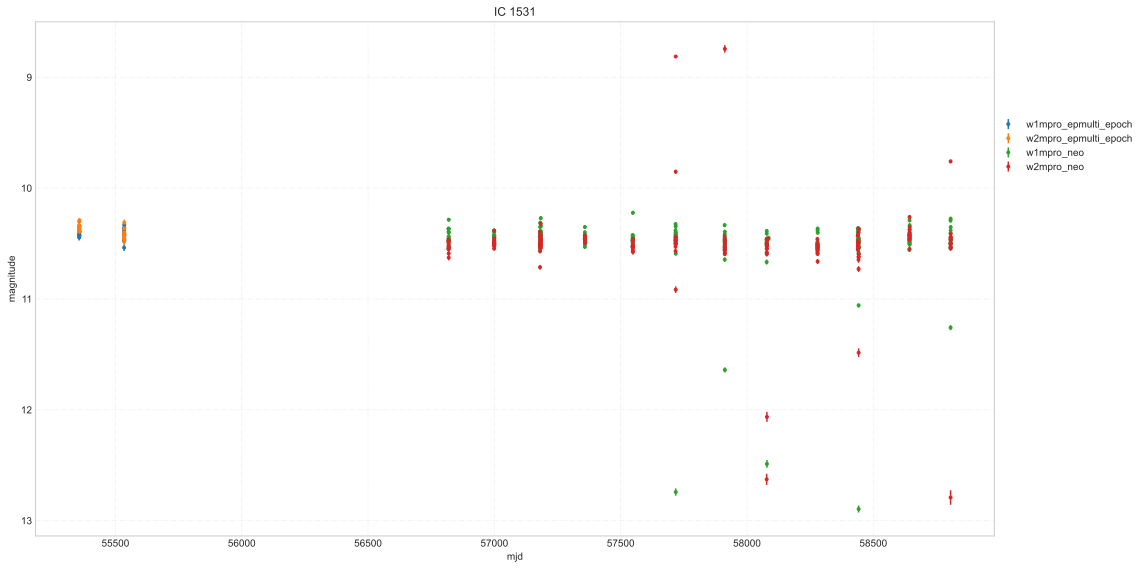

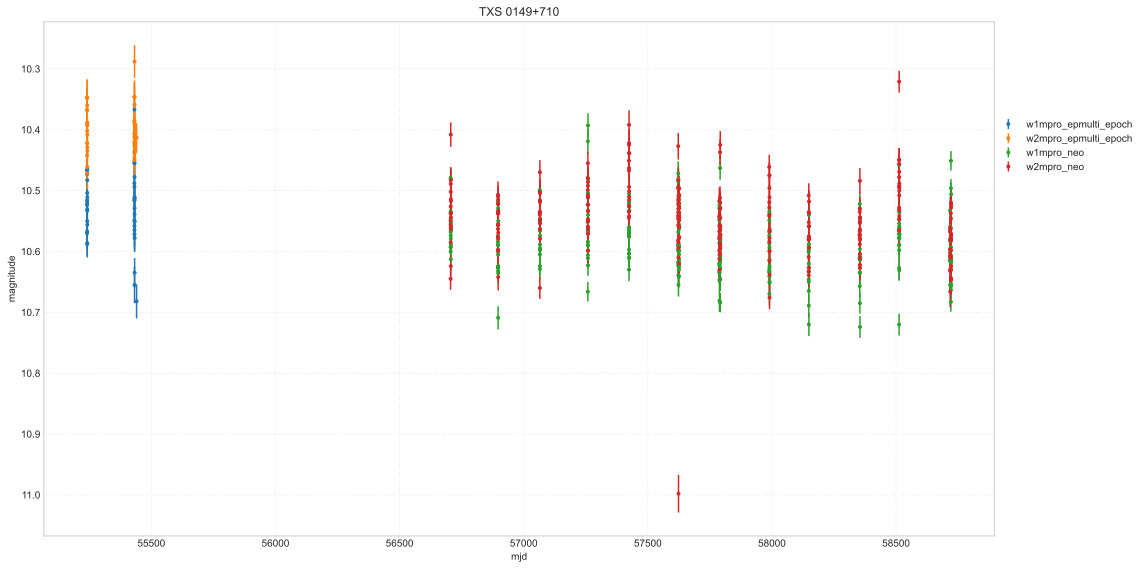

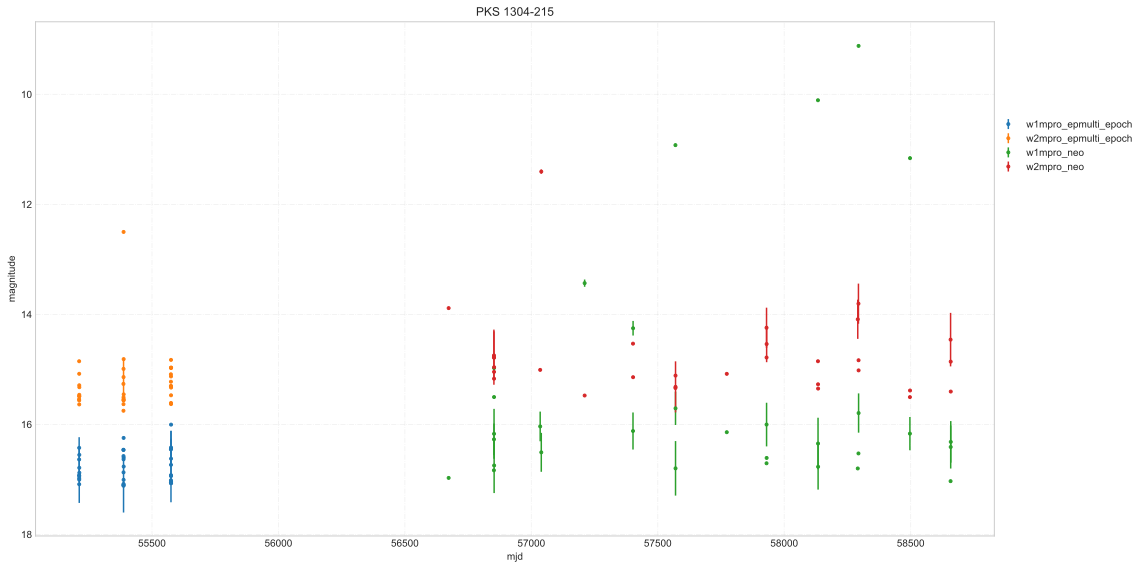

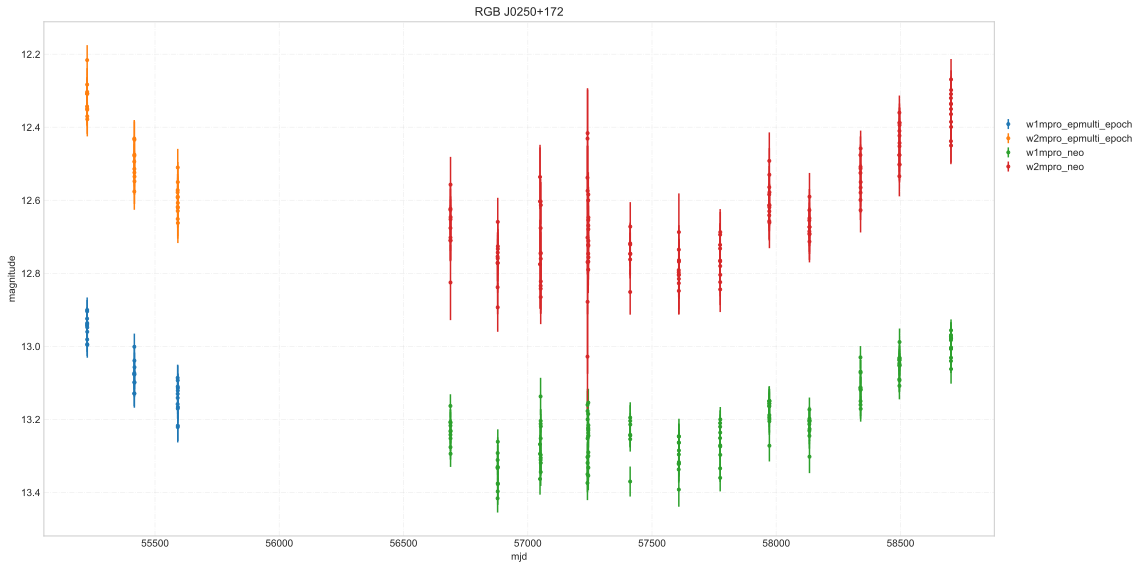

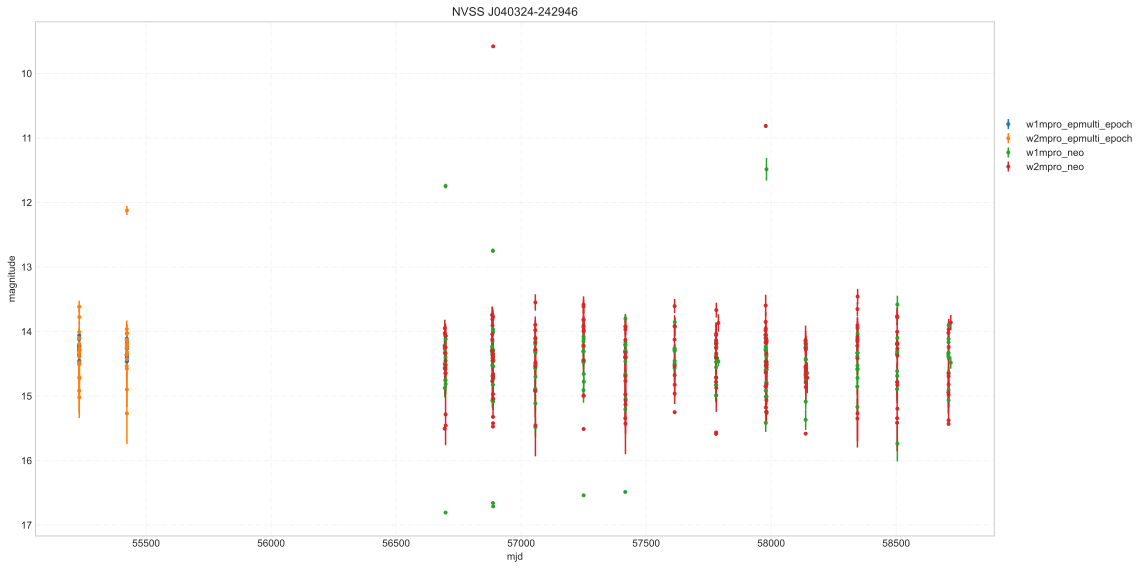

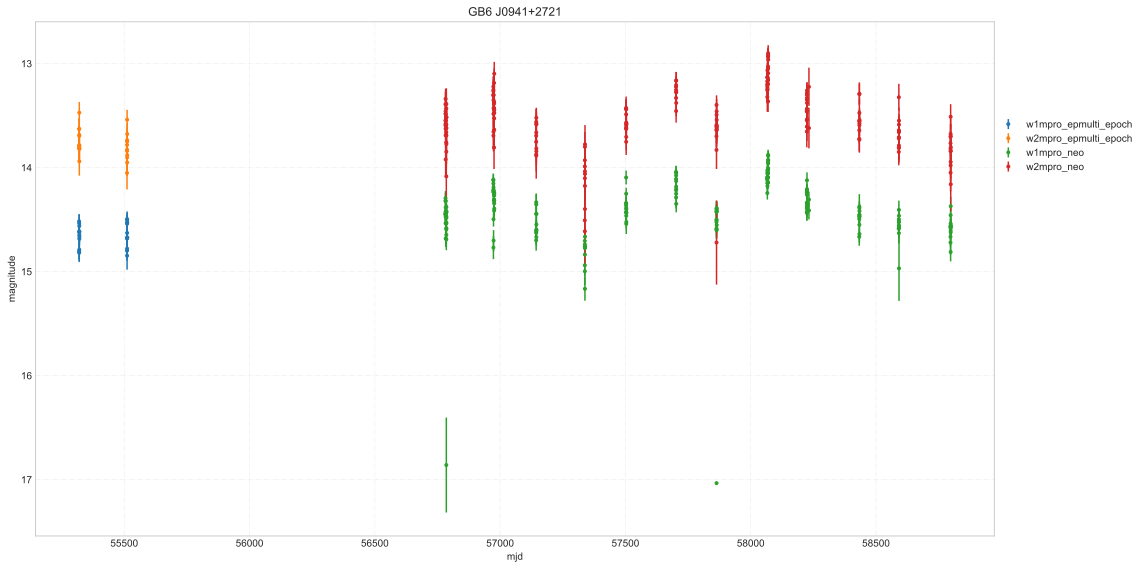

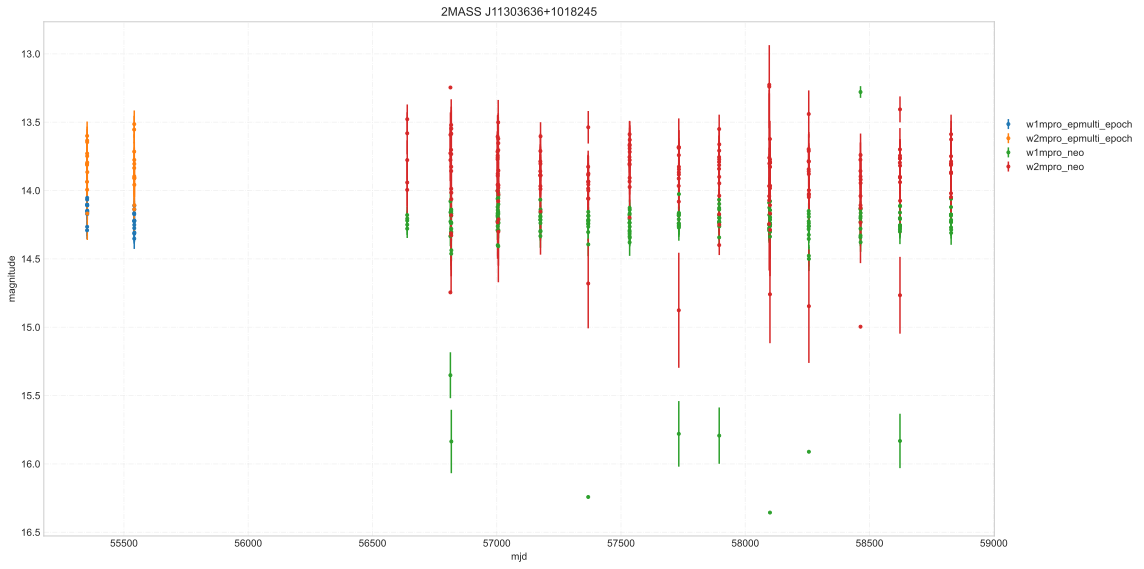

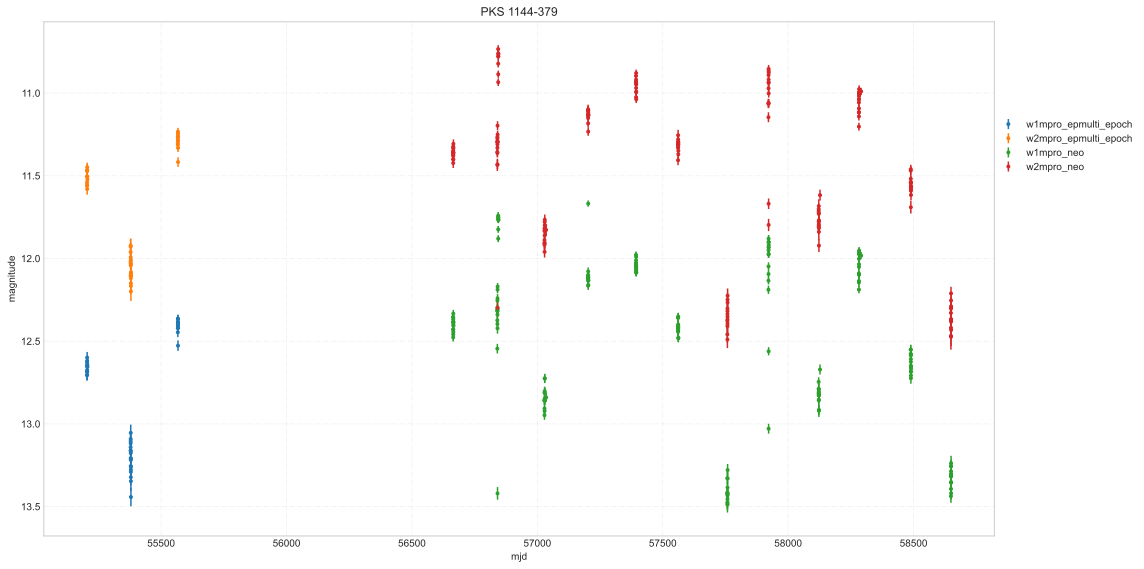

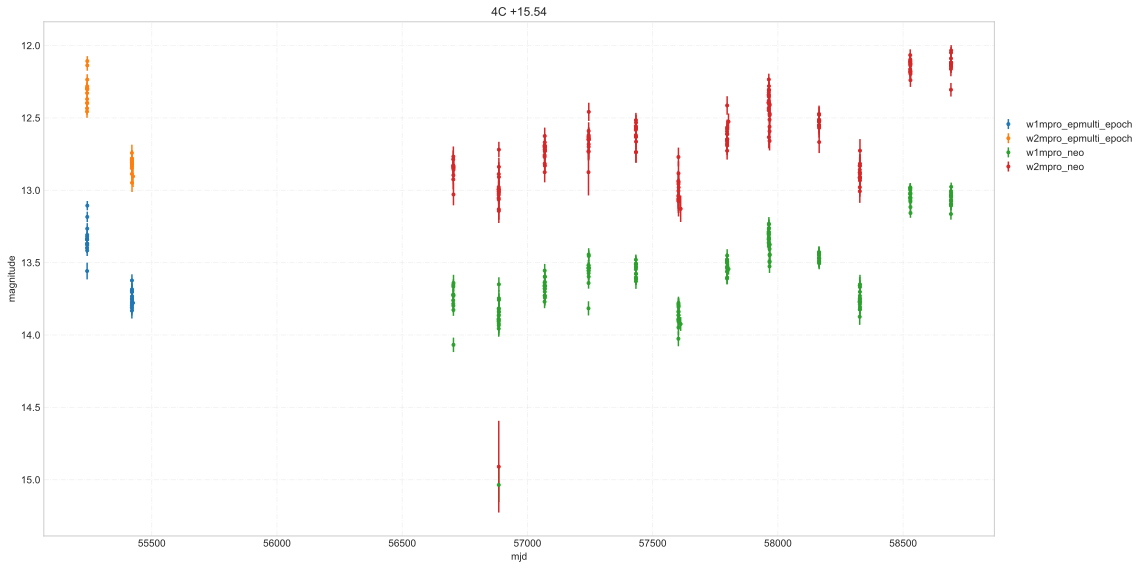

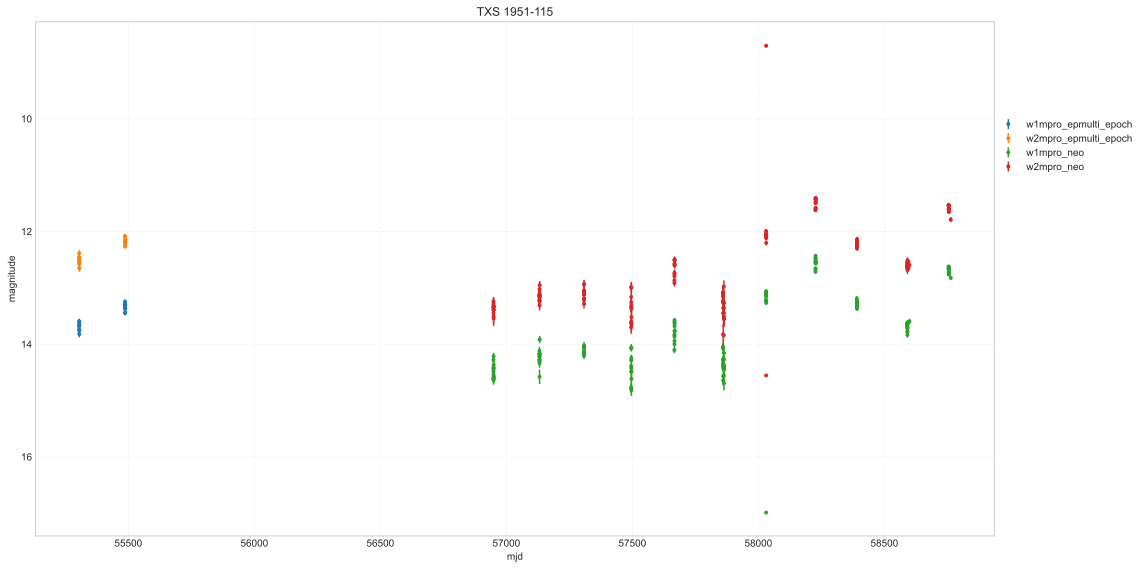

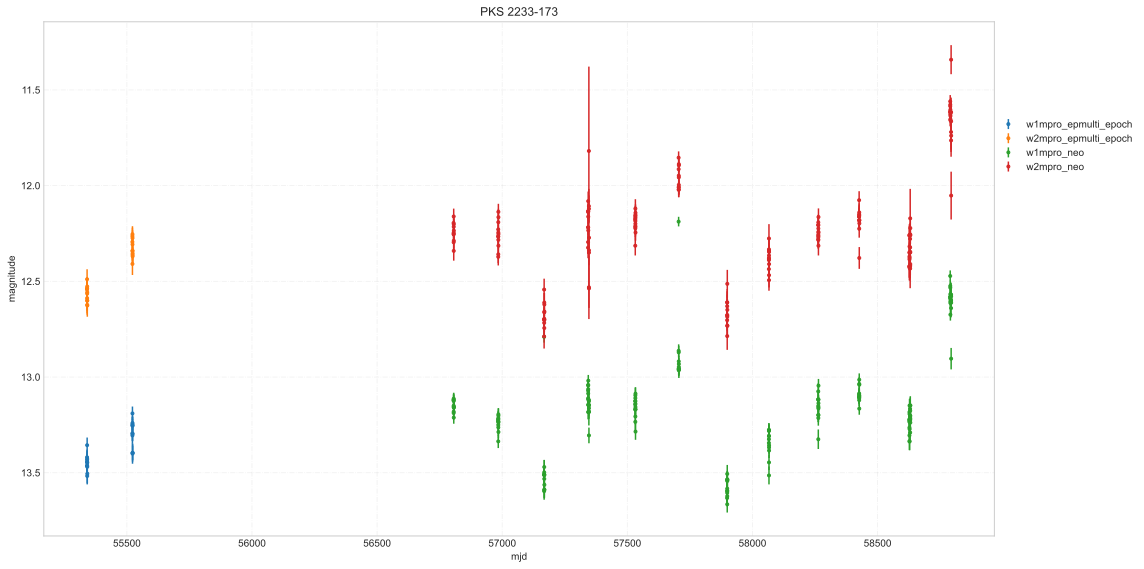

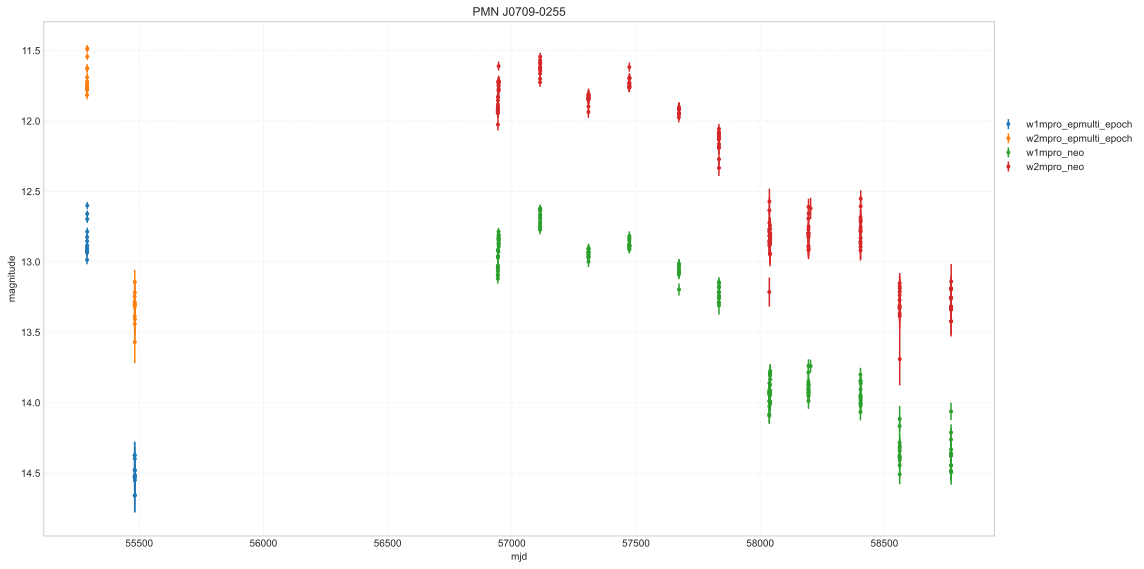

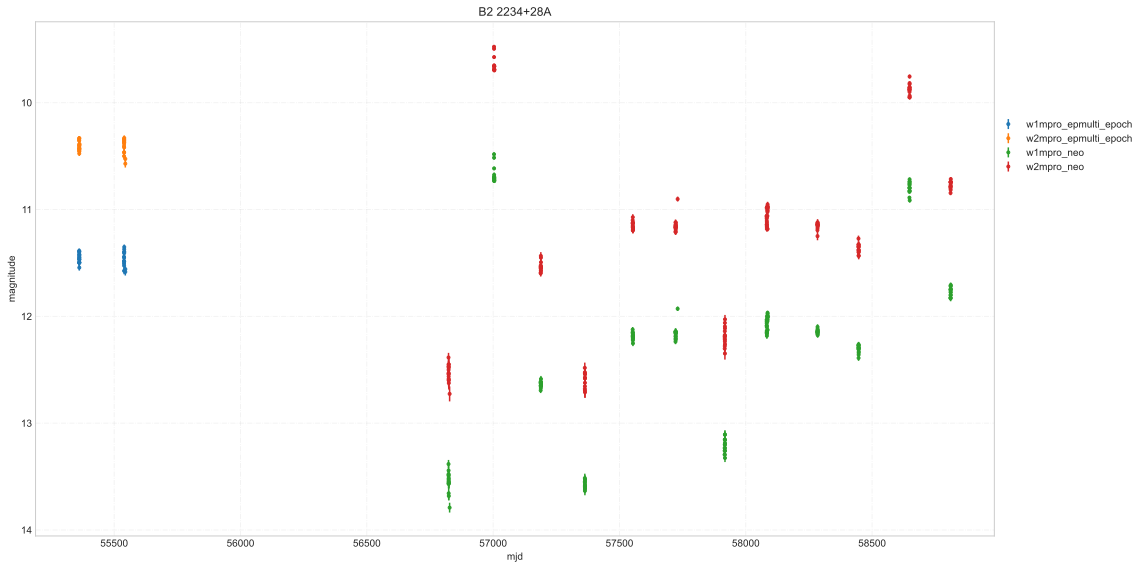

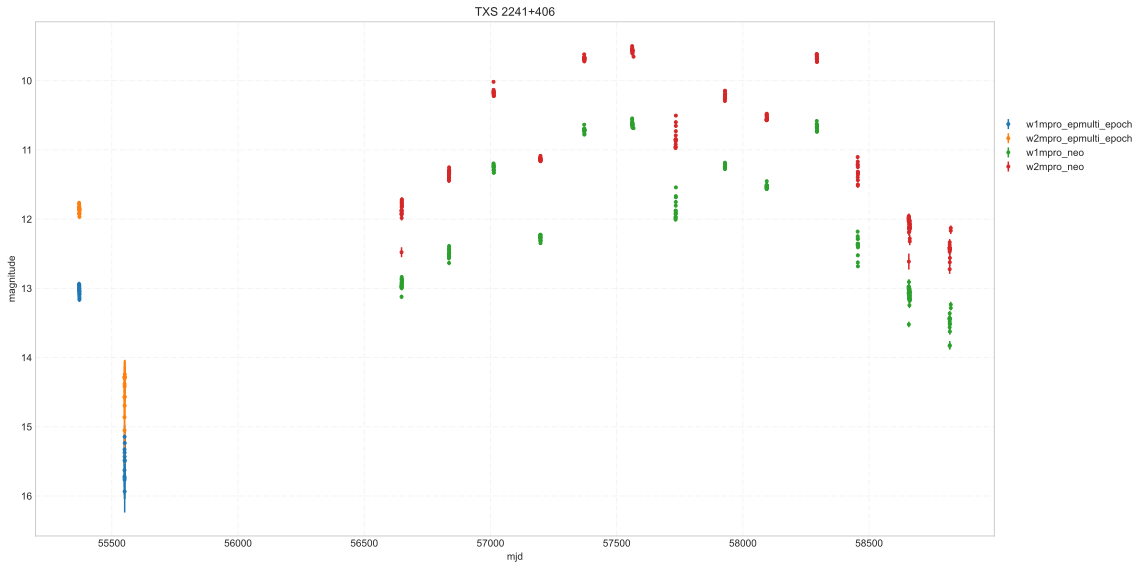

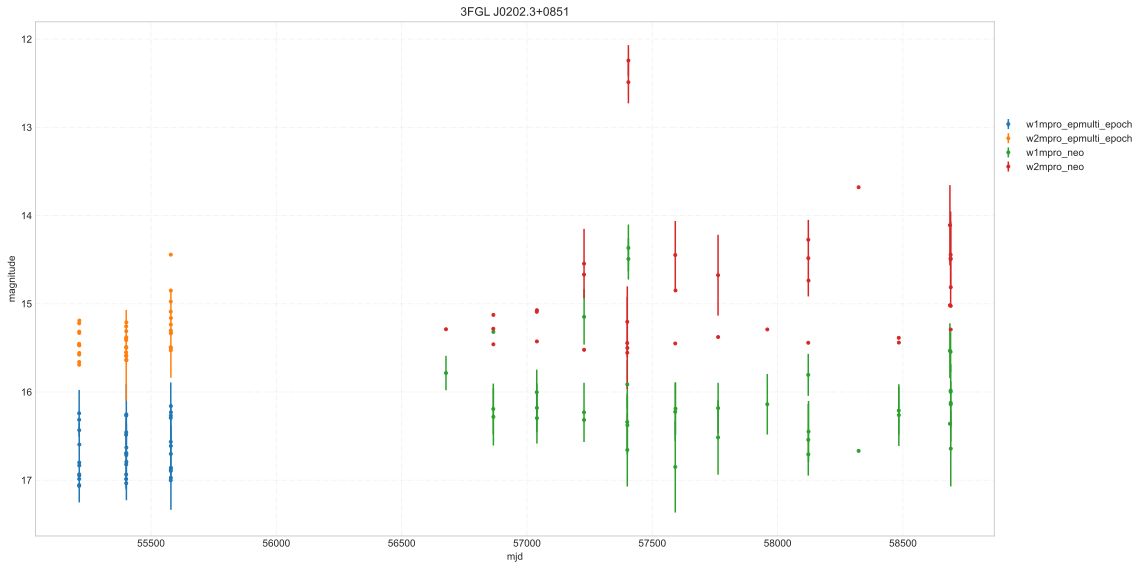

In [23]:
for i in fermi_wise_list['name']:
    print(i+'.csv')
    plot(i)


In [24]:
3**0.2

1.2457309396155174

In [26]:
3**0.42

1.5863204646842648

In [27]:
3**0.1

1.1161231740339044